# Importing liraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
df1 = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
df2 = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [3]:
df1.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [4]:
df2.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


# Merging both the dataframe

In [5]:
df = df1.merge(df2)

In [6]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26707,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26708,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26709,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26710,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [7]:
df.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

# Checking null values

In [8]:
df.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

# Dropping article link columns

In [9]:
df.drop('article_link',axis=1, inplace=True)

In [10]:
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26707,american politics in moral free-fall,0
26708,america's best 20 hikes,0
26709,reparations and obama,0
26710,israeli ban targeting boycott supporters raise...,0


In [11]:
df.shape

(26712, 2)

# Dropping duplicates values

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(26602, 2)

# Checking if html tag exist in headline column

In [14]:
import re
for i in df['headline'].values:
    if(len(re.findall('<.*?>', i))):
        print(i)
        break

In [15]:
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


# Loading the stemmer

In [16]:
from nltk.stem import SnowballStemmer
sno = SnowballStemmer('english')

# StopWords

In [17]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

# Cleaning and preprocessing the data

In [18]:
str1 = ' '
str = ' '
final_string = []

for i in df['headline'].values:
    fil_word = []
    for w in i.split():
        for cleanedwords in cleanpunc(w).split():
            if((cleanedwords.isalpha()) and (len(cleanedwords) > 2)):
                if(cleanedwords.lower() not in stop):
                    s = (sno.stem((cleanedwords.lower())).encode('utf8'))
                    fil_word.append(s)
    
    str1 = b' '.join(fil_word)
    final_string.append(str1)

# Creating a colum in data frame of preprocessed data

In [19]:
df['cleanedheadline'] = final_string

In [20]:
df

,headline,is_sarcastic,cleanedheadline
0,former versace store clerk sues over secret 'b...,0,b'former versac store clerk sue secret black c...
1,the 'roseanne' revival catches up to our thorn...,0,b'roseann reviv catch thorni polit mood better...
2,mom starting to fear son's web series closest ...,1,b'mom start fear son web seri closest thing gr...
3,"boehner just wants wife to listen, not come up...",1,b'boehner want wife listen come altern idea'
4,j.k. rowling wishes snape happy birthday in th...,0,b'rowl wish snape happi birthday magic way'
...,...,...,...
26707,american politics in moral free-fall,0,b'american polit moral'
26708,america's best 20 hikes,0,b'america best hike'
26709,reparations and obama,0,b'repar obama'
26710,israeli ban targeting boycott supporters raise...,0,b'isra ban target boycott support rais alarm a...


# Visulization

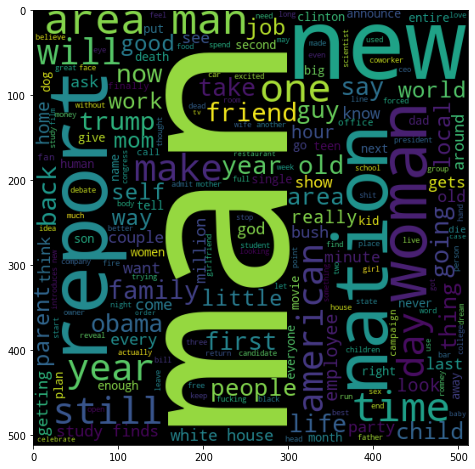

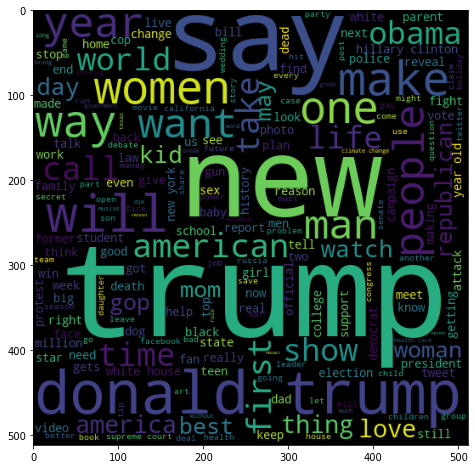

In [21]:
from wordcloud import WordCloud
pos = ' '.join(list(df[df['is_sarcastic'] == 1]['headline']))
neg = ' '.join(list(df[df['is_sarcastic'] == 0]['headline']))
pos_wc = WordCloud(width = 512, height = 512).generate(pos)
neg_wc = WordCloud(width = 512, height = 512).generate(neg)
plt.figure(figsize=(10,8))
plt.imshow(pos_wc)
plt.show()
plt.figure(figsize=(10,8))
plt.imshow(neg_wc)
plt.show()

# Initialiazing BOW

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2, 4)) 

# Separating the data

In [23]:
feature = df['cleanedheadline']
label = df['is_sarcastic']

# Applying BOW

In [24]:
feature = cv.fit_transform(feature)

# spliting into train and test

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(feature,label, test_size=0.3, random_state=0)

# Classification and prediction

In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))



              precision    recall  f1-score   support

           0       0.75      0.67      0.71      4505
           1       0.62      0.72      0.67      3476

    accuracy                           0.69      7981
   macro avg       0.69      0.69      0.69      7981
weighted avg       0.70      0.69      0.69      7981


Confusion Matrix:
 [[2996 1509]
 [ 973 2503]]

Accuracy :  0.6890114020799398


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
pred = clf.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))



              precision    recall  f1-score   support

           0       0.56      1.00      0.72      4505
           1       0.00      0.00      0.00      3476

    accuracy                           0.56      7981
   macro avg       0.28      0.50      0.36      7981
weighted avg       0.32      0.56      0.41      7981


Confusion Matrix:
 [[4505    0]
 [3476    0]]

Accuracy :  0.5644656058138078


In [30]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
pred = clf_tree.predict(x_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.95      0.74      4505
           1       0.78      0.20      0.32      3476

    accuracy                           0.63      7981
   macro avg       0.69      0.58      0.53      7981
weighted avg       0.68      0.63      0.56      7981


Confusion Matrix:
 [[4302  203]
 [2766  710]]

Accuracy :  0.6279914797644406
